## Fontes das funções

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def grafico_correlacoes(csv_path, coluna_alvo):
    # Lê o CSV
    df = pd.read_csv(csv_path)
    
    # Garante que só colunas numéricas sejam usadas na correlação
    df_numerico = df.select_dtypes(include='number')
    
    if coluna_alvo not in df_numerico.columns:
        raise ValueError(f"A coluna '{coluna_alvo}' não é numérica ou não está no dataset.")

    # Calcula a correlação da coluna alvo com todas as outras
    correlacoes = df_numerico.corr()[coluna_alvo].drop(labels=[coluna_alvo])

    # Ordena por valor da correlação
    correlacoes_ordenadas = correlacoes.sort_values(ascending=False)

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlacoes_ordenadas.values, y=correlacoes_ordenadas.index, palette='coolwarm', orient='h')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.title(f'Correlação com a coluna "{coluna_alvo}"')
    plt.xlabel('Coeficiente de Correlação de Pearson')
    plt.ylabel('Colunas')
    plt.tight_layout()
    plt.show()

def plotar_histogramas_duplos(caminho_csv, coluna1, coluna2):
    # Lê o dataset
    df = pd.read_csv(caminho_csv)

    # Extrai as colunas de interesse
    dados1 = df[coluna1]
    dados2 = df[coluna2]

    # Conta os valores não nulos
    count1 = dados1.notnull().sum()
    count2 = dados2.notnull().sum()

    # Cria os histogramas lado a lado
    plt.figure(figsize=(12, 5))

    # Histograma da primeira coluna
    plt.subplot(1, 2, 1)
    plt.hist(dados1.dropna(), bins=range(0, int(dados1.max()) + 2), edgecolor='black', color='skyblue')
    plt.title(f'{coluna1} (Total não nulos: {count1})')
    plt.xlabel(f"Número de {coluna1}")
    plt.ylabel('Frequência')
    plt.xticks(range(0, int(dados1.max()) + 1))

    # Histograma da segunda coluna
    plt.subplot(1, 2, 2)
    plt.hist(dados2.dropna(), bins=range(0, int(dados2.max()) + 2), edgecolor='black', color='salmon')
    plt.title(f'{coluna2} (Total não nulos: {count2})')
    plt.xlabel(f"Número de {coluna2}")
    plt.ylabel('Frequência')
    plt.xticks(range(0, int(dados2.max()) + 1))

    plt.tight_layout()
    plt.show()

    print(f"Tiro de meta 1 - média: {dados1.mean()}")
    print(f"Tiro de meta 2 - média: {dados2.mean()}")
    print(f"Tiro de meta 1 - mediana: {dados1.median()}")
    print(f"Tiro de meta 2 - mediana: {dados2.median()}")

def preencher_com_knn(caminho_entrada, caminho_saida, coluna_alvo, colunas_auxiliares, n_vizinhos=5):
    # Carrega os dados
    df = pd.read_csv(caminho_entrada)

    # Conta nulos antes
    nulos_antes = df[coluna_alvo].isnull().sum()

    # Remove linhas com nulos nas colunas auxiliares
    df_aux = df[colunas_auxiliares + [coluna_alvo]].dropna(subset=colunas_auxiliares)

    # Divide entre linhas com e sem alvo
    df_treino = df_aux[df_aux[coluna_alvo].notnull()]
    df_predicao = df_aux[df_aux[coluna_alvo].isnull()]

    if df_predicao.empty:
        print("[INFO] Nenhum valor nulo para preencher na coluna alvo.")
        df.to_csv(caminho_saida, index=False)
        return

    # Prepara treino
    X_train = df_treino[colunas_auxiliares]
    y_train = df_treino[coluna_alvo]

    # Prepara predição
    X_pred = df_predicao[colunas_auxiliares]

    # Modelo KNN
    model = KNeighborsRegressor(n_neighbors=n_vizinhos)
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_pred)

    # Preenche os nulos no dataframe original
    df.loc[df[coluna_alvo].isnull() & df[colunas_auxiliares].notnull().all(axis=1), coluna_alvo] = y_pred

    # Pós-preenchimento
    nulos_depois = df[coluna_alvo].isnull().sum()
    nulos_preenchidos = nulos_antes - nulos_depois
    media_preenchida = y_pred.mean()

    # Salva resultado
    df.to_csv(caminho_saida, index=False)

    # Relatório
    print(f"[RELATÓRIO - {coluna_alvo}]")
    print(f"Total de nulos antes:    {nulos_antes}")
    print(f"Nulos preenchidos:       {nulos_preenchidos}")
    print(f"Nulos restantes:         {nulos_depois}")
    print(f"Média dos valores previstos: {media_preenchida:.2f}\n")


def calcular_correlacao(caminho_csv, coluna1, coluna2, metodo='pearson'):
    df = pd.read_csv(caminho_csv)

    # Garante que os dados sejam numéricos
    df[coluna1] = pd.to_numeric(df[coluna1], errors='coerce')
    df[coluna2] = pd.to_numeric(df[coluna2], errors='coerce')

    # Remove linhas com nulos
    df_limp = df[[coluna1, coluna2]].dropna()

    # Calcula correlação
    correlacao = df_limp[coluna1].corr(df_limp[coluna2], method=metodo)

    print(f"Correlação ({metodo}) entre '{coluna1}' e '{coluna2}': {correlacao:.4f}")
    return correlacao


## Vamos ver o histograma de ocorrências (que temos disponível)

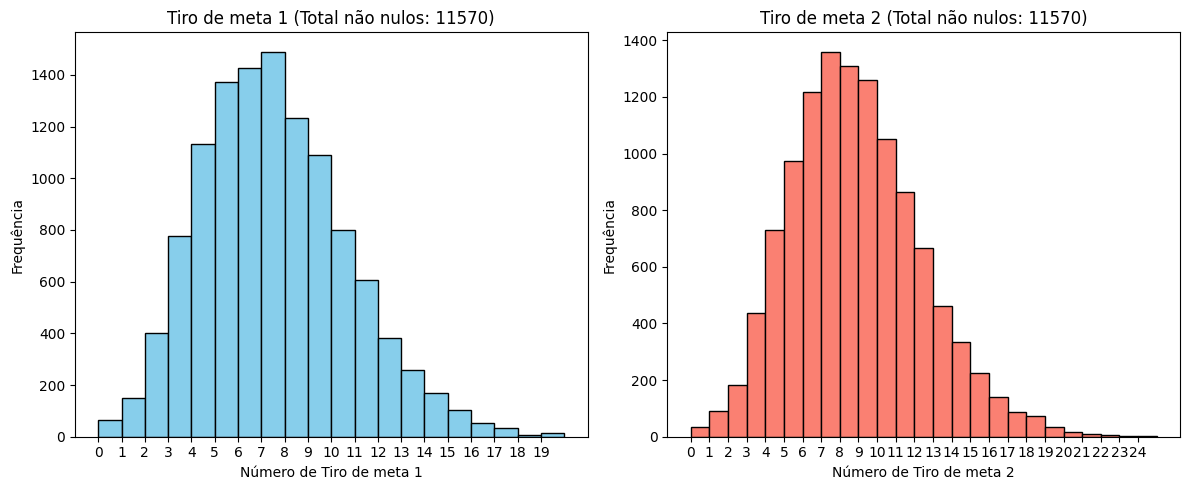

Tiro de meta 1 - média: 7.066464995678479
Tiro de meta 2 - média: 8.357303370786516
Tiro de meta 1 - mediana: 7.0
Tiro de meta 2 - mediana: 8.0


In [2]:
plotar_histogramas_duplos('saida_sem_outliers.csv', 'Tiro de meta 1', 'Tiro de meta 2')

Com os dados que temos percebemos que geralmente acontecem 3 substituições por jogo.

## Vamos dar uma olhada nas correlações!

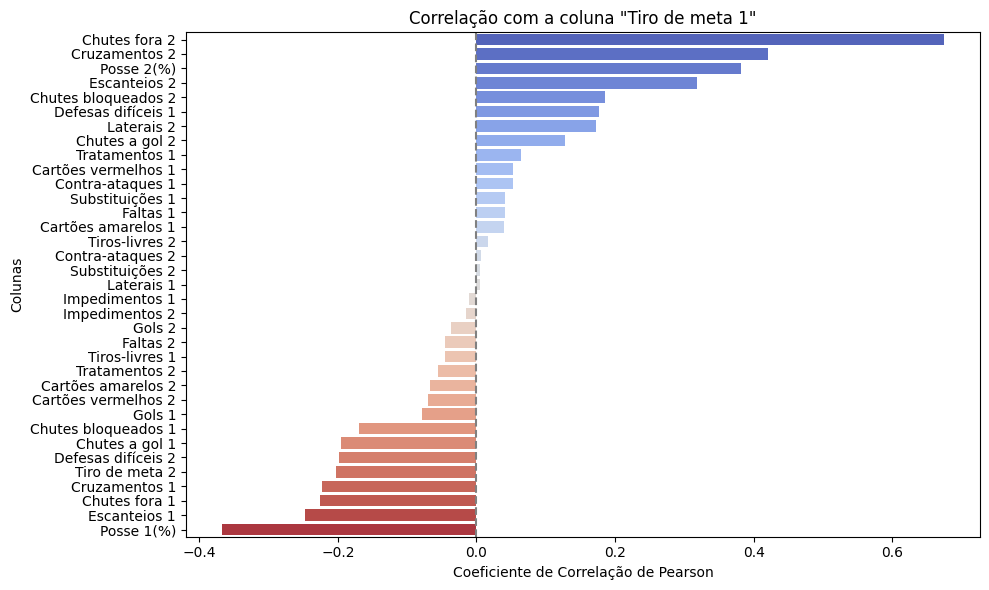

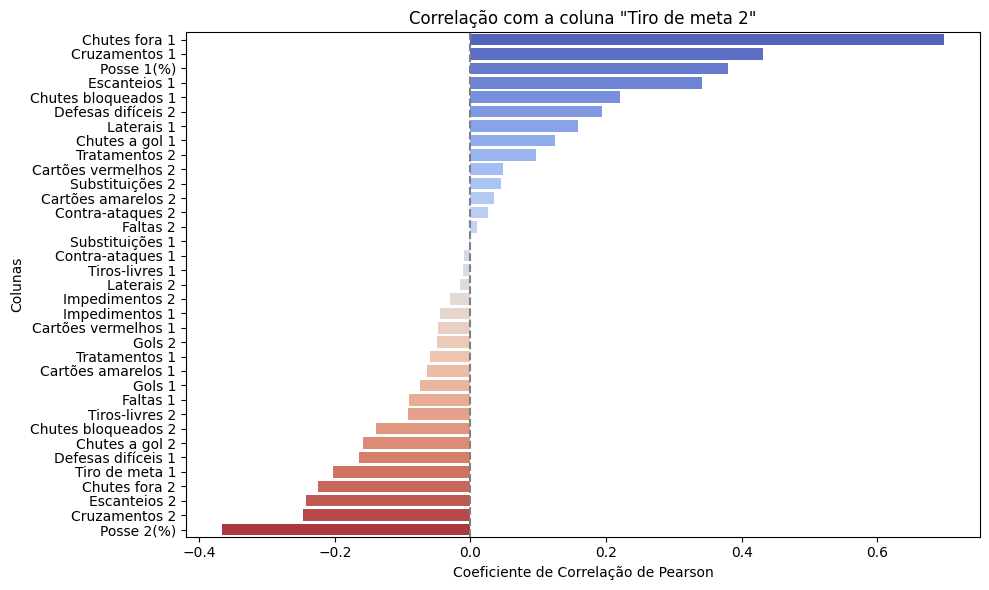

In [3]:
grafico_correlacoes('saida_sem_outliers.csv', 'Tiro de meta 1')
grafico_correlacoes('saida_sem_outliers.csv', 'Tiro de meta 2')

As maiores correlações são Chutes Fora, Cruzamento, Posse e Escanteio. Devemos analisar agora se de fato temos boa parte desses elementos para usarmos.

In [4]:
df = pd.read_csv("saida_sem_outliers.csv")
nulos_abs = df.isnull().sum()
nulos_pct = (nulos_abs / len(df)) * 100
resumo_nulos = pd.DataFrame({
    'Nulos absolutos': nulos_abs,
    '% do total': nulos_pct.round(2)
})
print(resumo_nulos)

                     Nulos absolutos  % do total
Chutes a gol 1                  1505        5.62
Chutes a gol 2                  1505        5.62
Impedimentos 1                  2740       10.22
Impedimentos 2                  2740       10.22
Escanteios 1                    2310        8.62
Escanteios 2                    2310        8.62
Chutes fora 1                   2305        8.60
Chutes fora 2                   2305        8.60
Faltas 1                        2304        8.60
Faltas 2                        2304        8.60
Cartões amarelos 1                 0        0.00
Cartões amarelos 2                 0        0.00
Cartões vermelhos 1                0        0.00
Cartões vermelhos 2                0        0.00
Cruzamentos 1                  18250       68.09
Cruzamentos 2                  18250       68.09
Laterais 1                     12230       45.63
Laterais 2                     12230       45.63
Chutes bloqueados 1            18404       68.67
Chutes bloqueados 2 

Vimos que 68% dos dados de cruzamento estão faltantes, por isso **não** usaremos esse fator no nosso modelo de preencimento.

## Vamos tentar preencher os valores usando o método de KNN

### Como funciona?

---
Primeiramente, tendo as maiores correlações de Tiros de meta calculados e encontrados, precisamos saber se podemos usar esses dados, ou se estão muito comprometidos (muitos faltantes).

Vimo logo acima que 68% dos dados de cruzamento estão faltando, por isso vamos nos ater as seguintes propriedades:

- Chutes fora
- Posse
- Escanteios

In [5]:
colunas_aux = ['Chutes fora 1', 'Chutes fora 2', 'Posse 1(%)', 'Posse 2(%)', 'Escanteios 1', 'Escanteios 2']
preencher_com_knn('saida_sem_outliers.csv', 'saida_com_valores_substituidos.csv', 'Tiro de meta 1', colunas_aux)
preencher_com_knn('saida_com_valores_substituidos.csv', 'saida_com_valores_substituidos.csv', 'Tiro de meta 2', colunas_aux)

[RELATÓRIO - Tiro de meta 1]
Total de nulos antes:    15232
Nulos preenchidos:       12905
Nulos restantes:         2327
Média dos valores previstos: 7.60

[RELATÓRIO - Tiro de meta 2]
Total de nulos antes:    15232
Nulos preenchidos:       12905
Nulos restantes:         2327
Média dos valores previstos: 9.07



Agora, apenas 2327 linhas estão com "Tiro de meta" 1 e 2 faltando, em comparação ao 15232 nulos de antes, tivemos uma boa melhoria na quantidade de dados válidos.

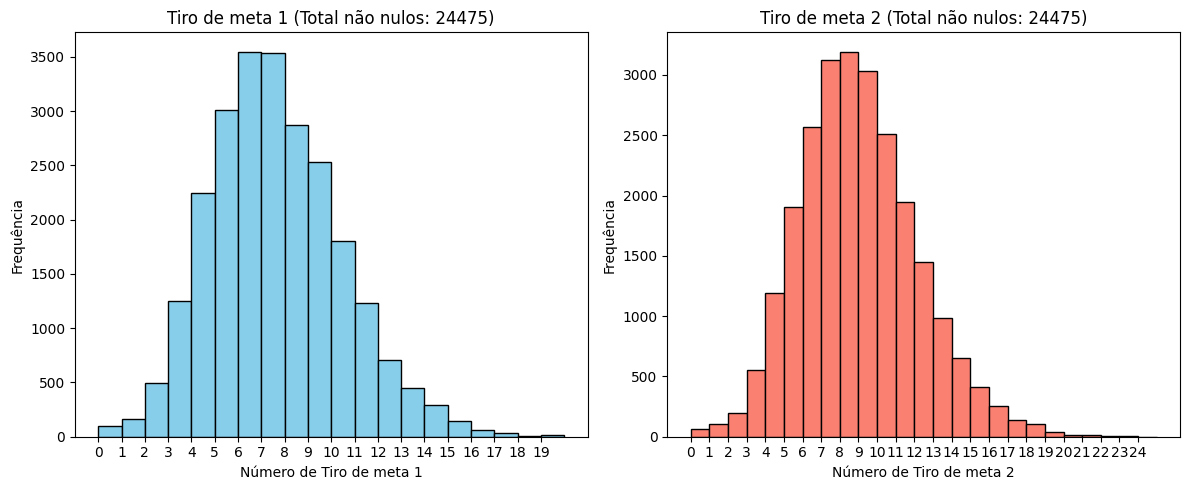

Tiro de meta 1 - média: 7.349139938712971
Tiro de meta 2 - média: 8.733752808988765
Tiro de meta 1 - mediana: 7.0
Tiro de meta 2 - mediana: 8.6


In [6]:
plotar_histogramas_duplos('saida_com_valores_substituidos.csv', 'Tiro de meta 1', 'Tiro de meta 2')

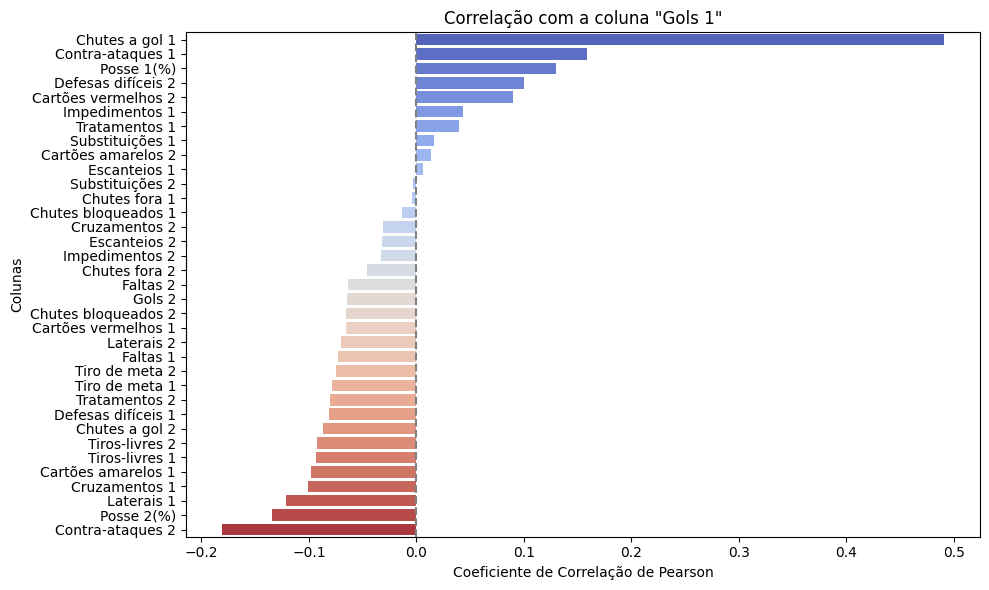

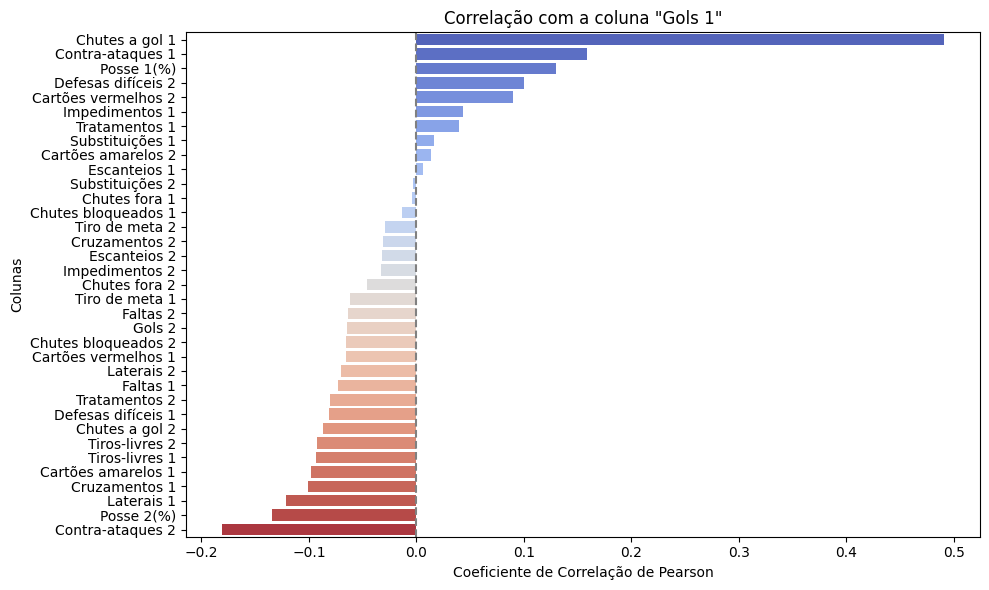

In [7]:
grafico_correlacoes('saida_sem_outliers.csv', 'Gols 1')
grafico_correlacoes('saida_com_valores_substituidos.csv', 'Gols 1')

In [8]:
calcular_correlacao('saida_sem_outliers.csv', 'Gols 1', 'Tiro de meta 1', metodo='pearson')
calcular_correlacao('saida_com_valores_substituidos.csv', 'Gols 1', 'Tiro de meta 1', metodo='pearson')
print("------------------------------------------------------")
calcular_correlacao('saida_sem_outliers.csv', 'Gols 1', 'Tiro de meta 2', metodo='pearson')
calcular_correlacao('saida_com_valores_substituidos.csv', 'Gols 1', 'Tiro de meta 2', metodo='pearson')
print("------------------------------------------------------")
calcular_correlacao('saida_sem_outliers.csv', 'Gols 2', 'Tiro de meta 1', metodo='pearson')
calcular_correlacao('saida_com_valores_substituidos.csv', 'Gols 2', 'Tiro de meta 1', metodo='pearson')
print("------------------------------------------------------")
calcular_correlacao('saida_sem_outliers.csv', 'Gols 2', 'Tiro de meta 2', metodo='pearson')
calcular_correlacao('saida_com_valores_substituidos.csv', 'Gols 2', 'Tiro de meta 2', metodo='pearson')

Correlação (pearson) entre 'Gols 1' e 'Tiro de meta 1': -0.0782
Correlação (pearson) entre 'Gols 1' e 'Tiro de meta 1': -0.0618
------------------------------------------------------
Correlação (pearson) entre 'Gols 1' e 'Tiro de meta 2': -0.0746
Correlação (pearson) entre 'Gols 1' e 'Tiro de meta 2': -0.0289
------------------------------------------------------
Correlação (pearson) entre 'Gols 2' e 'Tiro de meta 1': -0.0370
Correlação (pearson) entre 'Gols 2' e 'Tiro de meta 1': -0.0081
------------------------------------------------------
Correlação (pearson) entre 'Gols 2' e 'Tiro de meta 2': -0.0499
Correlação (pearson) entre 'Gols 2' e 'Tiro de meta 2': -0.0481


np.float64(-0.04812541070652882)

# Conclusão

Podemos ver que a correlação de Gols foi alterada. O mais perceptivel fica para correlação entre Gols 1 e Tiro de meta 2, que aumentou em quase 0.05. E conseguimos atingir mais de 24 mil linhas não nulas para ambas as colunas de Tiro de meta por meio do método KNeighborsRegressor, que é bem satisfatório para nosso modelo de previsão de resultados de gols.